In [1]:
import numpy as np
from pyrootmemo.fit.fit_x import GumbelFit, WeibullFit, PowerFit, GammaFit
from pyrootmemo.fit.fit_xy_linear import LinearFit
from pyrootmemo.fit.fit_x_binned import PowerFitBinned
from pyrootmemo.tools.helpers import units
import matplotlib.pyplot as plt

(array([ 3.,  1.,  6., 11., 10.,  7.,  8.,  1.,  2.,  1.]),
 array([ 8.01225836,  8.44726779,  8.88227723,  9.31728666,  9.75229609,
        10.18730553, 10.62231496, 11.05732439, 11.49233383, 11.92734326,
        12.36235269]),
 <BarContainer object of 10 artists>)

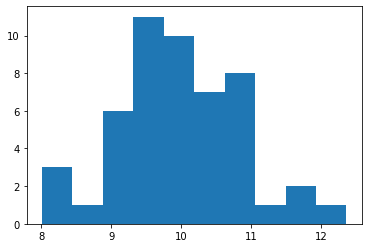

In [2]:
# generate some data
rng = np.random.default_rng()
x = rng.normal(10, 1, 50)
xu = x * units('mm')
plt.hist(x)

In [3]:
# check linear regression
y = 5.0 + 2.0 * x + rng.normal(0, 3, len(x))
yu = y * units('MPa')
fit = LinearFit(xu, yu)
print(fit.intercept)
print(fit.gradient)

4.956764899982435 megapascal
2.0041817722158455 megapascal / millimeter


In [15]:
# check gamma git
G = GammaFit(xu)
print(G.shape)
print(G.scale)
print(G.random(10))
print(G.covariance())
print(G.ks_distance())

# test for gorse B (Dan Bull)
x = np.array([
    0.12939, 0.16173, 0.19408, 0.22643, 0.25877, 
    0.29112, 0.29598, 0.30957, 0.32347, 0.35581, 
    0.42051, 0.48981, 0.51755, 0.54860, 0.54989,
    0.70439, 0.74017, 0.93805
])
n = np.array([5, 3, 11, 7, 6, 6, 1, 1, 4, 4, 2, 1, 2, 1, 2, 1, 1, 1])
xall = np.repeat(x, n)
GG = GammaFit(xall, weights = xall**2)
print(GG.shape, GG.scale)
print(GG._initialguess_shape_nondimensional(xall, xall**2))

127.49601712306132
0.07830163096865062 millimeter
[8.15660345725343 9.988949215044505 9.053129314328697 10.131952663711912 10.323847308126382 10.724567390437727 11.65604805610366 8.94333185951925 10.543556368965769 10.426384067735084] millimeter
[[ 1.27036892e-01  6.03455059e-04]
 [ 6.03455059e-04 -3.72068922e-07]]
0.0791092510160703
4.301520626699636 0.11534426136678187
4.141885346145984


2.609016234648692 / millimeter
-1.0537705483667767
8.012258359337459 millimeter
12.362352692536474 millimeter
[11.606050926715055 9.085106786697473 9.279188483852945 11.025958731453699 8.585708085035305 10.30082285234486 10.819568662052719 9.30593556724673 8.802481476951565 11.194195839193801] millimeter
1.2760803401814127
[[ 1.61071666e+09 -3.18721072e+04  5.27303772e+03  1.57113363e+03]
 [-3.18721072e+04  3.21438651e+00 -1.17634213e-01 -5.32111194e-01]
 [ 5.27303772e+03 -1.17634213e-01  3.42364165e-02 -3.65795367e-03]
 [ 1.57113363e+03 -5.32111194e-01 -3.65795367e-03  1.49873953e-01]]
0.2131681179262043
[0.2196565138843635 0.23952892687042612 0.2526196444971145 0.2282086607962726 0.23218576755769801 0.2291635296675699 0.22004816891911785 0.2505205816290345 0.2256356907870889 0.19819738522147196 0.2263671798128823 0.2149679406322426 0.21583959733022595 0.2511303206064488 0.22373856311997048 0.20871011279475143 0.29115646485045243 0.2892283191280058 0.24353675743508263 0.24054131107958

c:\Users\gjm36\AppData\Local\miniforge3\envs\rrmm\Lib\site-packages\matplotlib\cbook.py:1398: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  return np.asarray(x, float)


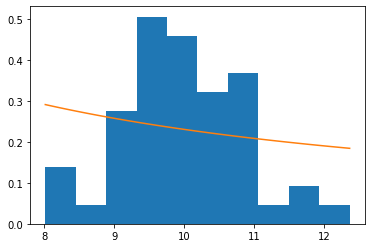

In [5]:
# test Power fit with units
Pu = PowerFit(xu)
print(Pu.multiplier)
print(Pu.exponent)
print(Pu.lower)
print(Pu.upper)
print(Pu.random(10))
print(Pu.covariance())
print(Pu.covariance(method = 'bootstrap'))
print(Pu.ks_distance())
print(Pu.density())
print(Pu.density(cumulative = True))

plt.hist(xu, density = True)
xp = np.linspace(Pu.lower, Pu.upper, 100)
yp = Pu.density(xp)
plt.plot(xp, yp, '-')

9.544363352273235 millimeter
0.8673990759669709 millimeter
[9.370624299424229 10.31909744422689 9.3879541861585 12.274301723903477 9.326804868366828 8.599281906985823 11.935818209011305 10.790355946023793 10.018818336743601 13.722095269696911] millimeter
[0.2814253776681678 0.4215014092912643 0.3801477549284113 0.3594595204567586 0.3889947734150095 0.3671216209293438 0.2851907125809705 0.39580748325944 0.33741670706119414 0.10433449884430115 0.3438657175296253 0.23658766944602871 0.2448284084444617 0.39158723372093673 0.32016027345676545 0.18043684531183138 0.019434297031071433 0.025548478711756185 0.4233309207842153 0.4231337412246367 0.19357277295886965 0.18833915677093374 0.36031531162667324 0.1448382742368129 0.4230555697818674 0.04305202287455956 0.41156622605537274 0.1729893443718801 0.061500250630150834 0.39910763541632605 0.19486024372665078 0.42281859138156763 0.3112600482951237 0.23396278345699292 0.37864646853714906 0.34114698725513176 0.42122640066587114 0.33210024789297027

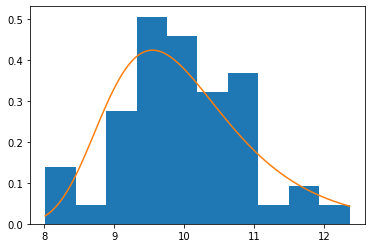

In [6]:
# Gumbel fit with units
Gu = GumbelFit(xu)
print(Gu.location)
print(Gu.scale)
print(Gu.random(10))
print(Gu.density())
print(Gu.density(cumulative = True))
print(Gu.covariance())
print(Gu.covariance(method = 'bootstrap'))
print(Gu.ks_distance())
print(Gu.loglikelihood(deriv = 0))
print(Gu.loglikelihood(deriv = 1))
print(Gu.loglikelihood(deriv = 2))

plt.hist(xu, density = True)
xp = np.linspace(min(xu), max(xu), 100)
yp = Gu.density(xp)
plt.plot(xp, yp, '-')

In [7]:
# Test Gumbel fit
G = GumbelFit(x)
print(G.location)
print(G.scale)
print(G.random(10))
print(G.covariance())
print(G.ks_distance())


0.3166291281363265
0.16198547200847
[0.11683679 0.39238778 0.28556934 0.51053801 0.19094654 0.47013247
 0.39200343 0.3758326  0.28407188 0.22138701]
[[0.0016104  0.00038381]
 [0.00038381 0.00096495]]
0.1165890666883132


In [8]:
# test Weibull fit
W = WeibullFit(x)
print(W.shape)
print(W.scale)
print(W.random(10))
print(W.covariance())
print(W.ks_distance())
print(W.density())

2.076723734019981
0.46992840541655945
[0.81514289 0.41864515 0.16224759 0.31495388 0.37238305 0.49109574
 0.63352799 0.28893614 0.32324884 0.40605067]
[[-0.76448827  0.16239187]
 [ 0.16239187 -0.04390656]]
0.13101452833921268
[1.02900622 1.25651095 1.45416161 1.61652981 1.74001244 1.82293535
 1.83186394 1.85198624 1.86528109 1.86872769 1.77249968 1.55382261
 1.44475031 1.31455669 1.30902834 0.67308283 0.5522696  0.13925694]


11.60369273348771
10.389126009587665 millimeter
[10.084538759292444 11.115159542000919 8.751832493520286 9.646968307607239 10.469311253848609 9.023979226852623 9.602720183410332 8.876504576059661 10.047265012826513 11.224902872305519] millimeter
0.10888375901563827
[0.4061214177247876 0.33252908733936515 0.23461730458650523 0.40239389489973265 0.3829376093723346 0.3984792804529722 0.40746284670562893 0.24947751983688074 0.4099839393656088 0.11496795298593454 0.40830289455375607 0.37643781657302017 0.3839141692205826 0.24510624517180046 0.4123533244384792 0.2974738655695665 0.06766346247769017 0.07207314169608656 0.3018877329403229 0.32485897093781535 0.3205789667732827 0.1393230299176287 0.40199112418765537 0.22050783165325857 0.3001446374637537 0.0038198969549952965 0.27010977866791636 0.28307432494985263 0.09109755461895384 0.37284031035276366 0.3226863846042418 0.3266723009481015 0.41236224934668325 0.37385069616793404 0.391184137984138 0.4090648076799601 0.2920469482139865 0.201962

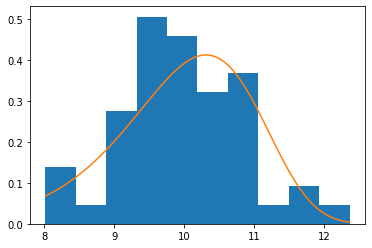

In [9]:
# Weibull with units
Wu = WeibullFit(xu)
print(Wu.shape)
print(Wu.scale)
print(Wu.random(10))
print(Wu.ks_distance())
print(Wu.density())
print(Wu.density(cumulative = True))
print(Wu.loglikelihood(deriv = 0))
print(Wu.loglikelihood(deriv = 1))
print(Wu.loglikelihood(deriv = 2))
print(Wu.covariance())

plt.hist(xu, density = True)
xp = np.linspace(min(xu), max(xu), 100)
yp = Wu.density(xp)
plt.plot(xp, yp, '-')